<a href="https://colab.research.google.com/github/evanstjabadi/stock/blob/main/stock_lib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install stocker
!pip install yfinance


  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=a5f5ac18e192523f80c00e0169da45aabeb212ffc8b0533681fdf5aef4aaeeb3
  Stored in directory: /root/.cache/pip/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
ERROR: yfinance 0.1.63 has requirement lxml>=4.5.1, but you'll have lxml 4.2.6 which is incompatible.
     |████████████████████████████████| 6.3MB 2.9MB/s 
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [5]:
import stocker

[*********************100%***********************]  1 of 1 completed


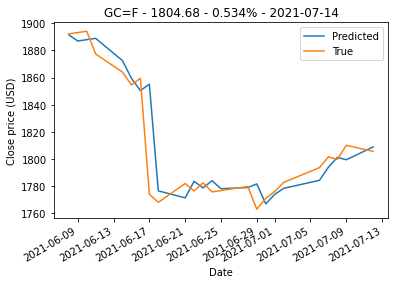

[1804.68, 0.534, '2021-07-14']

In [6]:
pred = stocker.predict.tomorrow('GC=F', plot=True)
pred

In [ ]:
pred

[1810.25, 0.552, '2021-07-13']

In [4]:
import yfinance as yf
df = yf.download('GC=F', '2021-07-8', '2021-07-13', auto_adjust=True)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-07-08,1797.000000,1818.500000,1797.000000,1799.599976,148
2021-07-09,1803.599976,1810.099976,1798.800049,1810.000000,218
2021-07-12,1802.599976,1805.500000,1799.500000,1805.500000,218
